In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 16

In [0]:
path_csv = Path("/content/drive/My Drive/Datasets/covid-chestxray-dataset-master/images")

In [0]:
data = ImageDataBunch.from_csv(path_csv, valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4,label_col=4, fn_col=10, bs=bs).normalize(imagenet_stats)

In [0]:
data.classes

['ARDS', 'COVID-19', 'No Finding', 'Pneumocystis', 'SARS', 'Streptococcus']

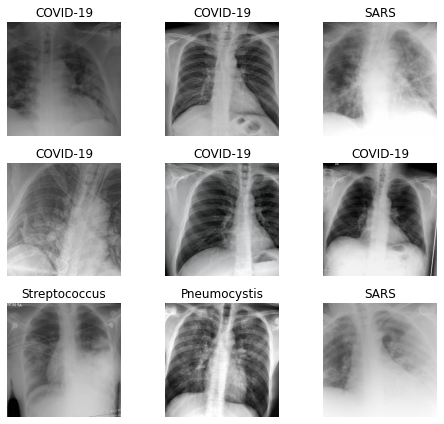

In [0]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['ARDS', 'COVID-19', 'No Finding', 'Pneumocystis', 'SARS', 'Streptococcus'],
 6,
 116,
 29)

In [0]:
learn = cnn_learner(data, models.resnet152, metrics=accuracy)

In [0]:
learn.fit_one_cycle(30)

epoch,train_loss,valid_loss,accuracy,time
0,3.113728,3.644788,0.034483,00:10
1,3.071198,2.542822,0.137931,00:10
2,2.895780,2.027912,0.344828,00:10
3,2.749831,2.537911,0.448276,00:10
4,2.591123,2.369721,0.551724,00:10
5,2.363075,1.933116,0.551724,00:10
6,2.188684,2.468137,0.586207,00:10
7,1.991133,2.682024,0.586207,00:10
8,1.837941,2.506692,0.620690,00:10
9,1.677807,2.321337,0.655172,00:10


In [0]:
learn.save("stage-1")

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


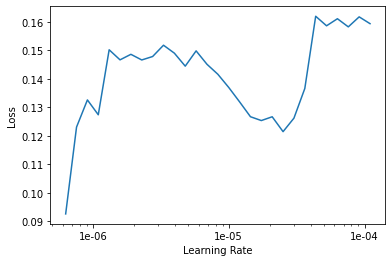

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(4, max_lr=slice(1e-06, 1e-05))

epoch,train_loss,valid_loss,accuracy,time
0,0.146696,0.836773,0.793103,00:10
1,0.142574,0.838191,0.793103,00:10
2,0.122361,0.865997,0.793103,00:11
3,0.120097,0.782866,0.827586,00:10


In [0]:
learn.save("stage-2")

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

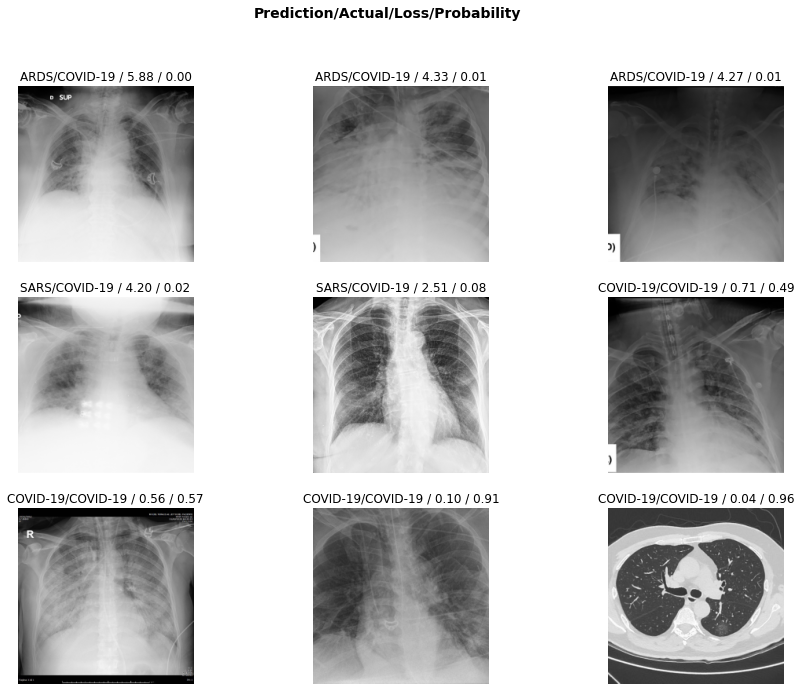

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

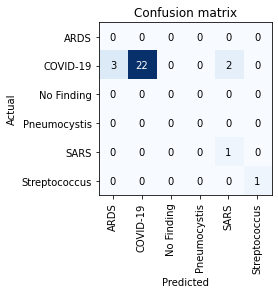

In [0]:
interp.plot_confusion_matrix()

In [1]:
interp.most_confused(min_val=2)

NameError: ignored